<a href="https://colab.research.google.com/github/jlopez00001/M-todos-num-ricos/blob/main/M%C3%A9todos_num%C3%A9ricos_3parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRACIÓN NUMERICA (FORMULAS NEWTON-COTES )

In [1]:
import sympy as sp  # importamos sympy


x = sp.Symbol('x') # estamos definiendo la variable simbolica x

f = sp.sin(x)  # definimo la función a integrar


def regla_trapezoidal(f, a, b): # Trapezoidal (n=1)
    h = b - a
    return (h / 2) * (f.subs(x, a) + f.subs(x, b))


def regla_simpson(f, a, b): #  formula de Simpson 1/3 (n=2)
    h = (b - a) / 2
    return (h / 3) * (f.subs(x, a) + 4*f.subs(x, a + h) + f.subs(x, b))


def regla_tres_octavos(f, a, b): # Simpson 3/8 (n=3)
    h = (b - a) / 3
    return (3*h / 8) * (f.subs(x, a) + 3*f.subs(x, a + h) + 3*f.subs(x, a + 2*h) + f.subs(x, b))


def newton_cotes_cerrada_n4(f, a, b): # Newton-Cotes cerrada n=4
    h = (b - a) / 4
    puntos = [a + i*h for i in range(5)]
    coef = [7, 32, 12, 32, 7]
    suma = sum(c * f.subs(x, xi) for c, xi in zip(coef, puntos))
    return (2*h / 45) * suma

# Newton-Cotes abiertas

def newton_cotes_abierta_n0(f, a, b):
    h = (b - a) / 2
    return (b - a) * f.subs(x, a + h)

def newton_cotes_abierta_n1(f, a, b):
    h = (b - a) / 3
    x1 = a + h
    x2 = a + 2*h
    return (3*h / 2) * (f.subs(x, x1) + f.subs(x, x2))

def newton_cotes_abierta_n2(f, a, b):
    h = (b - a) / 4
    puntos = [a + h, a + 2*h, a + 3*h]
    coef = [2, -1, 2]
    return (4*h / 3) * sum(c*f.subs(x, xi) for c, xi in zip(coef, puntos))

def newton_cotes_abierta_n3(f, a, b):
    h = (b - a) / 5
    puntos = [a + i*h for i in range(1, 5)]
    coef = [11, 1, 1, 11]
    return (5*h / 24) * sum(c*f.subs(x, xi) for c, xi in zip(coef, puntos))

# Intervalo de integración
a = 0
b = 3.1416/4

# Mostrar resultados (evalf convierte el resultado a decimal)
print("CERRADAS:")
print("Trapezoidal:", regla_trapezoidal(f, a, b).evalf())
print("Simpson 1/3:", regla_simpson(f, a, b).evalf())
print("Simpson 3/8:", regla_tres_octavos(f, a, b).evalf())
print("Newton-Cotes cerrada n=4:", newton_cotes_cerrada_n4(f, a, b).evalf())

print("\nABIERTAS:")
print("Abierta n=0:", newton_cotes_abierta_n0(f, a, b).evalf())
print("Abierta n=1:", newton_cotes_abierta_n1(f, a, b).evalf())
print("Abierta n=2:", newton_cotes_abierta_n2(f, a, b).evalf())
print("Abierta n=3:", newton_cotes_abierta_n3(f, a, b).evalf())

CERRADAS:
Trapezoidal: 0.277681342960815
Simpson 1/3: 0.292933937061992
Simpson 3/8: 0.292912001466899
Newton-Cotes cerrada n=4: 0.292894481235902

ABIERTAS:
Abierta n=0: 0.300560234112581
Abierta n=1: 0.297988887635593
Abierta n=2: 0.292859957388073
Abierta n=3: 0.292870526478417


REGLA COMPUESTA DE SIMPSON

Aproximación con n=2: 56.76958295257789
Valor exacto (exp(2)): 53.598150033144236
Error absoluto: 3.1714329194336557


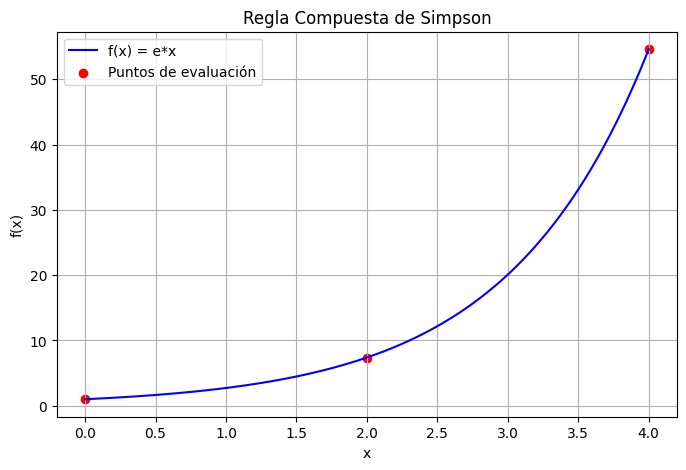

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Definición de la función a integrar
def f(x):
    return np.exp(x)

# Regla de Simpson compuesta
def simpson_compuesta(f, a, b, n):# recibe como parametros la función f un intervalo y n entero par
    if n % 2 != 0:                 # verifica que n sea par
        raise ValueError("n debe ser par")
    h = (b - a) / n                                #divición del intervalo
    x = np.linspace(a, b, n + 1)
    fx = f(x)
    S = fx[0] + fx[-1] + 4 * sum(fx[1:-1:2]) + 2 * sum(fx[2:-2:2])
    return (h / 3) * S

# Parámetros del ejemplo
a = 0
b = 4
n = 2# Número de subintervalos (par)

# Aproximación y valor exacto
aprox = simpson_compuesta(f, a, b, n)
exacto = np.exp(b) - np.exp(a)
error = abs(exacto - aprox)

# Mostrar resultados
print(f"Aproximación con n={n}: {aprox}")
print(f"Valor exacto (exp(2)): {exacto}")
print(f"Error absoluto: {error}")

# Gráfica
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Puntos usados en la regla de Simpson
x_simpson = np.linspace(a, b, n + 1)
y_simpson = f(x_simpson)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = e*x", color='blue')
plt.scatter(x_simpson, y_simpson, color='red', label='Puntos de evaluación')
plt.title("Regla Compuesta de Simpson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()